## Data Visualization
This notebook is created to obtain the visualisations mentioned in the question.

The wildfire data is annual, so your time series will be on an annual basis. All the time series should cover the analysis range defined above, but not the prediction range.
1. Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city for all fires ranging up to 1800 miles away from your assigned city. Your histogram should indicate the distance cut-off for your modeling work as specified in Step 1.



In [10]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# load required data files
all_wildfire = pd.read_csv("all_records.csv")
aqi_df = pd.read_csv("aqi_1964_2024.csv")
fire_info = pd.read_csv("fire_distance_info.csv")
smoke_estimate = pd.read_csv("smoke_estimate_per_year.csv")


In [3]:
all_wildfire.head()

,name,year,shortest_distance,size,type,avg_distance,perimeter_start
0,1860-0-Big Quilcene River (1),1860,990.552967,3940.207089,Wildfire,991.826498,"[47.82096426863667, -123.03391282044802]"
1,1860-1-Harrison Lake (1),1860,987.144880,772.518249,Wildfire,987.757186,"[47.760085709530074, -123.05860885146123]"
2,1860-2-Tunnel Creek (1),1860,989.162768,333.020409,Wildfire,989.538861,"[47.77931119606787, -123.09626737568851]"
3,1870-3-1870 (2),1870,822.544676,22294.993577,Wildfire,825.667429,"[46.056393372979834, -115.76193511192794]"
4,1870-4-No Fire Name Provided (2),1870,697.044757,36.985574,Wildfire,697.193596,"[43.92219609043537, -114.27933395410464]"


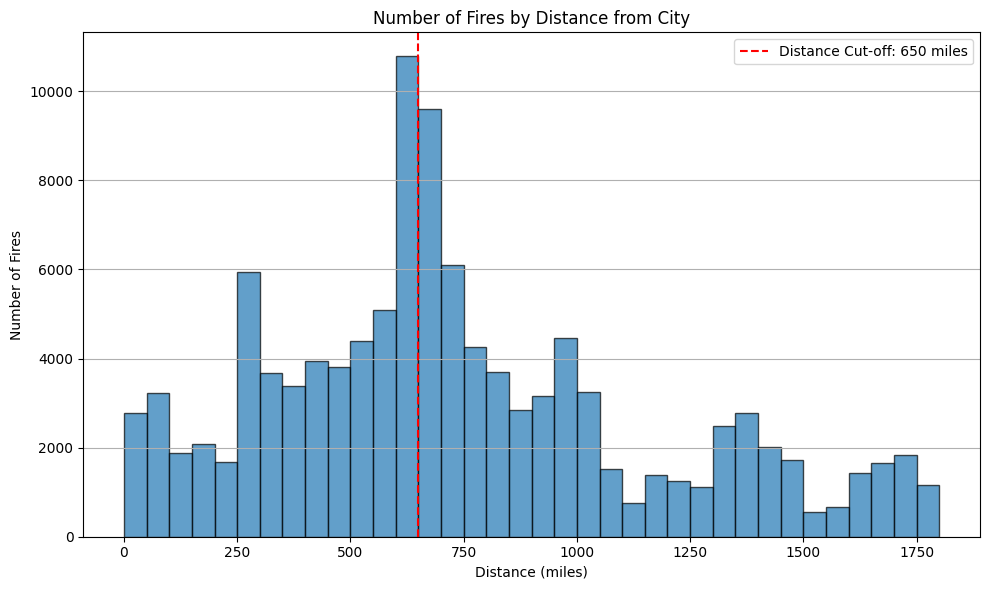

In [7]:
distance_cutoff = 1800
bin_width = 50
bins = list(range(0, distance_cutoff + bin_width, bin_width))

plt.figure(figsize=(10, 6))
plt.hist(all_wildfire['shortest_distance'], bins=bins, edgecolor='black', alpha=0.7)

plt.title('Number of Fires by Distance from City')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Fires')

# Set x-ticks to show every 250 miles
xticks = list(range(0, distance_cutoff + 1, 250))
plt.xticks(xticks)

# Draw a vertical line for the distance cut-off
plt.axvline(x=650, color='r', linestyle='--', label=f'Distance Cut-off: 650 miles')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The above plot shows the distribution of fires based on their distance from the city of Rialto, with the x-axis representing the distance in miles and the y-axis indicating the number of fires. The red line marks a cut-off distance at 650 miles. The data peaks in the 500-750 mile range, where the number of fires is highest, and then gradually declines as the distance increases. This pattern suggests a concentration of fires within a specific range from Rialto, with fewer incidents occurring as the distance grows.

2. Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.



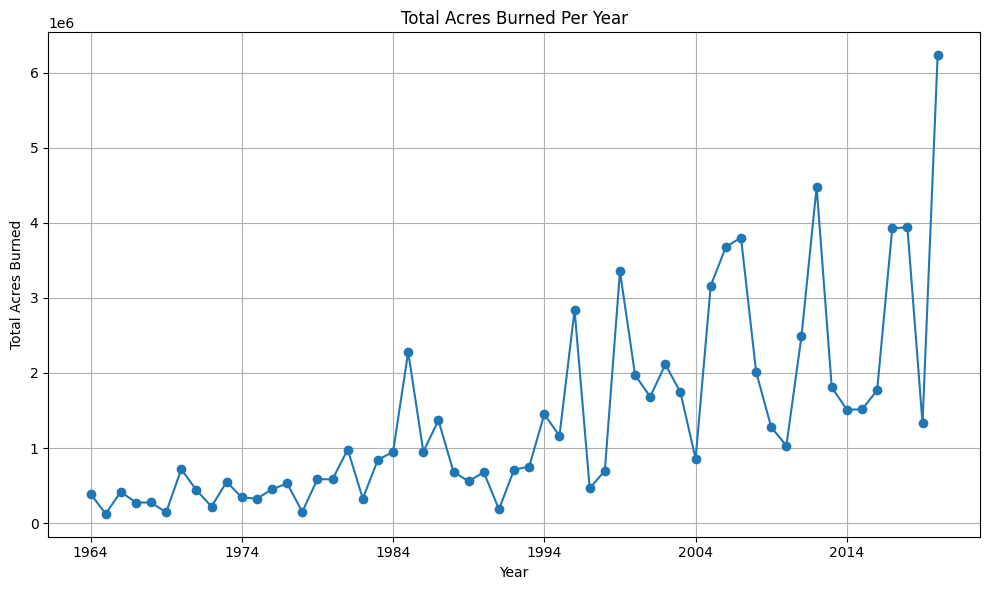

In [9]:
acres_burned_per_year = fire_info.groupby('year')['size'].sum().reset_index()

# Plotting the time series graph
plt.figure(figsize=(10, 6))
plt.plot(acres_burned_per_year['year'], acres_burned_per_year['size'], marker='o')

# Add labels and title
plt.title('Total Acres Burned Per Year')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')

# Set x-ticks to show every 10 years
xticks = range(acres_burned_per_year['year'].min(), acres_burned_per_year['year'].max() + 1, 10)
plt.xticks(xticks)
plt.grid()
plt.tight_layout()
plt.show()

This plot displays the total acres burned by wildfires per year from 1960 to recent years. The x-axis represents the year, while the y-axis shows the total acres burned in millions. Over time, there is a noticeable upward trend, with periods of increased activity, particularly from the 1980s onward. Notable spikes are seen around the early 1980s, mid-2000s, and a significant peak in the most recent year shown, where the total acres burned exceeds 6 million. This trend suggests an increase in wildfire severity or frequency over the decades.

3. Produce a time series graph containing your fire smoke estimates for your city and the AQI estimates for your city.


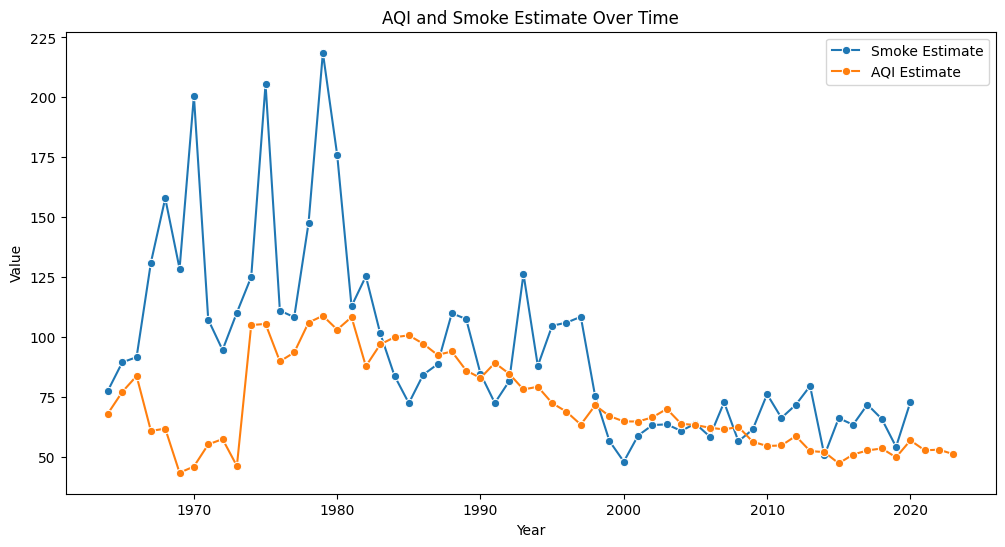

In [12]:
# plot time series graph containing smoke estimate and aqi index in the same plot
plt.figure(figsize=(12, 6))

sns.lineplot(data=smoke_estimate, x='year', y='smoke_estimate', marker='o', label='Smoke Estimate')
sns.lineplot(data=aqi_df, x='year', y='aqi', marker='o', label='AQI Estimate')
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('AQI and Smoke Estimate Over Time')
plt.legend()
plt.show()

This line plot illustrates the trends of Smoke Estimate and AQI (Air Quality Index) Estimate over time. The x-axis represents the year, while the y-axis shows the values for both metrics. The Smoke Estimate, shown in blue, fluctuates significantly with high peaks in the 1960s to early 1980s, reaching values above 200, then gradually declines with fewer and lower peaks in recent years. The AQI Estimate, represented in orange, generally remains lower than the Smoke Estimate and shows a relatively steady pattern with a gradual decrease over time. This plot suggests that while smoke levels were initially high and variable, both smoke and air quality estimates have improved in recent years.

From the graph we can see a positive correlation between the Smoke Estimate and AQI Estimate over time, especially in the earlier years when both metrics tend to move in tandem. When smoke levels are high, AQI values generally increase as well, indicating poorer air quality associated with higher smoke levels. However, the correlation weakens in later years as the Smoke Estimate shows a more pronounced decline, while the AQI Estimate remains relatively stable with less fluctuation. This shift suggests that although smoke levels have decreased over time, other factors may now be influencing air quality independently of smoke, or air quality management efforts may be mitigating some impacts of smoke on AQI.